# TIME SERIES ANALYSIS FOR CRAIGSLIST VEHICLES

### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Loading the dataset

In [2]:
df = pd.read_csv("C:/Users/ADMIN/OneDrive/Desktop/Mike/mydata/craigslist_vehicles.csv/craigslist_vehicles.csv")
df.head(3)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00


### Data cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [4]:
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [6]:
# Fill missing values in numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    mode_val = df[col].mode().iloc[0]  # Calculate the mode value
    df[col].fillna(mode_val, inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
county          426880
state                0
lat                  0
long                 0
posting_date         0
removal_date         0
dtype: int64

In [8]:
# Convert the 'Month' column to a datetime object
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [9]:
# Sort the DataFrame by date in ascending order
df.sort_values(by='posting_date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df = df.drop_duplicates(subset='posting_date', keep='first')

In [11]:
# Set the 'Month' column as the index
df.set_index('posting_date', inplace=True)


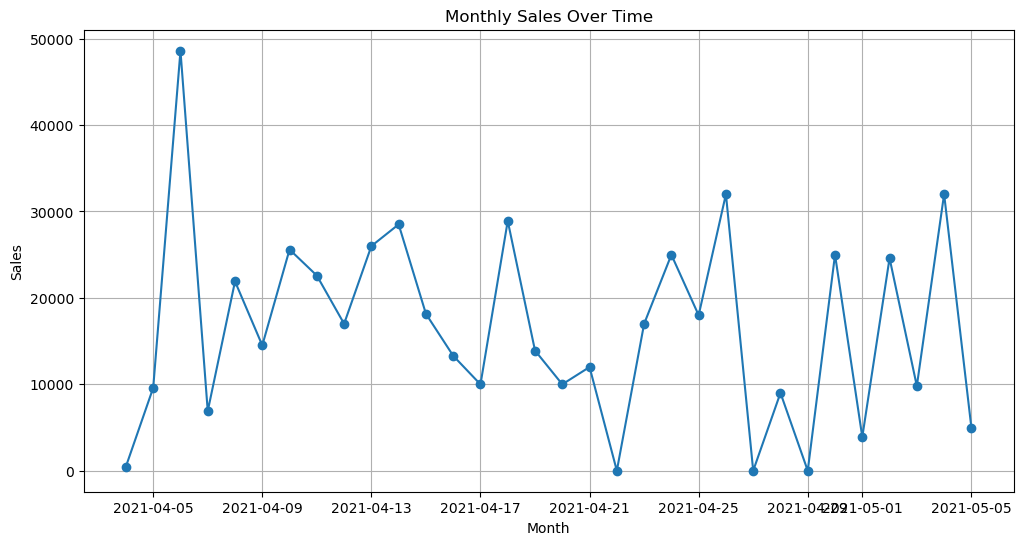

In [12]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

### Calculating Mean and Standard deviation 

In [13]:
# Calculate the mean and standard deviation
mean_price = df['price'].mean()
std_price = df['price'].std()

print("Mean Price:", mean_price)
print("Standard Deviation of price:", std_price)

Mean Price: 16533.59375
Standard Deviation of price: 11349.128054781595


### Time series Decomposition

In [14]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive',period=12)

In [15]:
# Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Original Time Series')

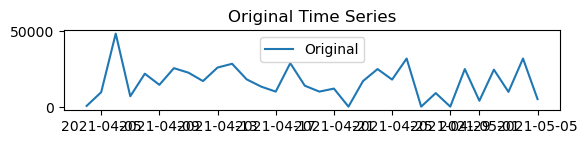

In [16]:
plt.subplot(4, 1, 1)
plt.plot(df.index, df['price'], label='Original')
plt.legend()
plt.title('Original Time Series')

Text(0.5, 1.0, 'Trend Component')

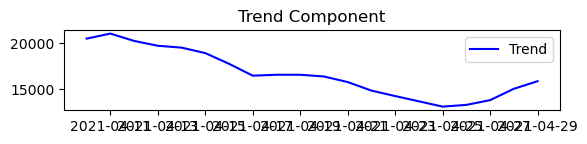

In [17]:
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='b')
plt.legend()
plt.title('Trend Component')

Text(0.5, 1.0, 'Seasonal Component')

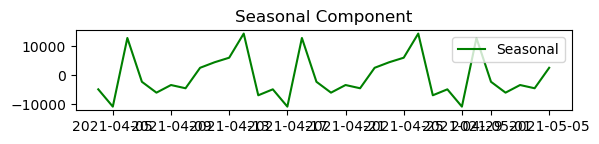

In [18]:
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='g')
plt.legend()
plt.title('Seasonal Component')

Text(0.5, 1.0, 'Residual Component')

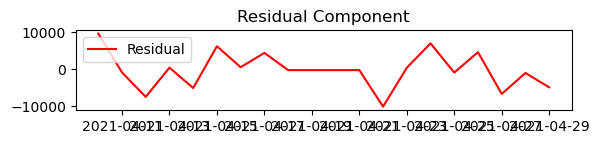

In [19]:
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='r')
plt.legend()
plt.title('Residual Component')

### The ARIMA Model in Time Series Analysis

In [20]:
df.sort_values(by='posting_date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
p = 1 # p: AutoRegressive (AR) order
d = 1 # d: Integrated (I) order (order of differencing)
q = 1 # q: Moving Average (MA) order

In [22]:
# Fit an ARIMA model to the data
model = sm.tsa.ARIMA(df['price'], order=(p, d, q))

In [23]:
results = model.fit()

In [24]:
# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.462
Date:                Sat, 28 Oct 2023   AIC                            676.923
Time:                        13:56:28   BIC                            681.225
Sample:                             0   HQIC                           678.325
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1607      0.299     -0.538      0.591      -0.746       0.425
ma.L1         -1.0000      0.184     -5.426      0.000      -1.361      -0.639
sigma2      1.334e+08   1.38e-09   9.66e+16      0.0

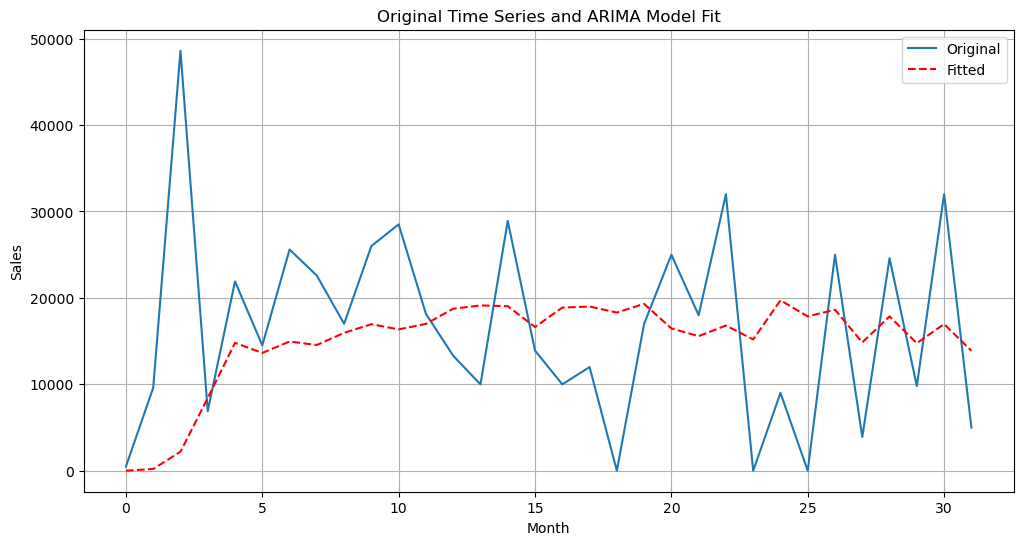

In [25]:
# Plot the original time series and the ARIMA model's predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Original')
plt.plot(df.index, results.fittedvalues, color='red', label='Fitted', linestyle='--')
plt.legend()
plt.title('Original Time Series and ARIMA Model Fit')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

# Display the plot
plt.show()

### Forecasting future values 

In [26]:
frequency = 'M'

In [27]:
# Forecast future values
forecast_periods = 12  # Change the number of forecast periods as needed
forecast = results.get_forecast(steps=forecast_periods)

In [28]:
# Extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

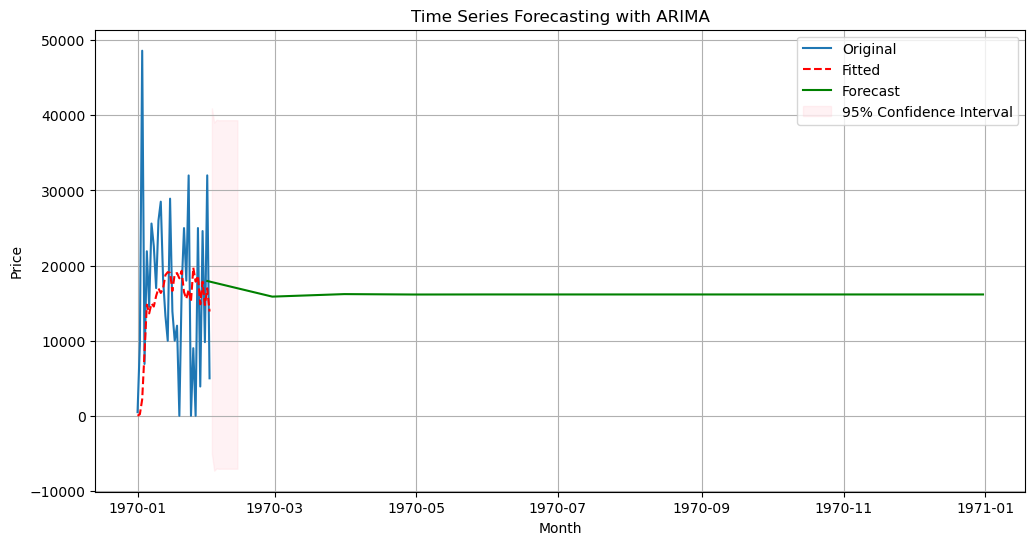

In [29]:
# Plot the original time series, ARIMA model's fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Original')
plt.plot(df.index, results.fittedvalues, color='red', label='Fitted', linestyle='--')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_periods, freq=frequency), forecasted_values, color='green', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)

# Display the plot
plt.show()